<a href="https://colab.research.google.com/github/IndraP24/Full-Stack-Deep-Learning-Spring21/blob/main/Part%201%20Basics%20%7C%20Coding%20a%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

```
# This is treated as a code block
```
---

# Colab environment

In [1]:
!python --version

Python 3.7.10


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.29.0        
tensorflow-probability        0.12.1        


In [3]:
!pip list | grep torch

torch                         1.8.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.1         
torchvision                   0.9.1+cu101   


In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Basic Numerical Computing

In [5]:
import numpy as np

# Initialize a numpy ndarray 3 rows , 2 cols
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole colummn
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
              [1, 2],
              [3, 4],
              [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
x = np.array([10, 20])
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x #Broadcasting

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [11]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [12]:
# Matrix multiplication

x = np.array([[10, 20], ]).T
result = X @ x # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

## Indexing

In [13]:
X = np.random.rand(3, 2)
X

array([[0.247535  , 0.41587171],
       [0.75896184, 0.63316846],
       [0.18163725, 0.22160558]])

In [14]:
X > 0.5

array([[False, False],
       [ True,  True],
       [False, False]])

In [15]:
X[X > 0.5] = 1
X

array([[0.247535  , 0.41587171],
       [1.        , 1.        ],
       [0.18163725, 0.22160558]])

# Basic Plotting

In [16]:
import matplotlib.pyplot as plt
import matplotlib
plt.set_cmap('gray')
matplotlib.rcParams['figure.figsize'] = (12, 8)

<Figure size 432x288 with 0 Axes>

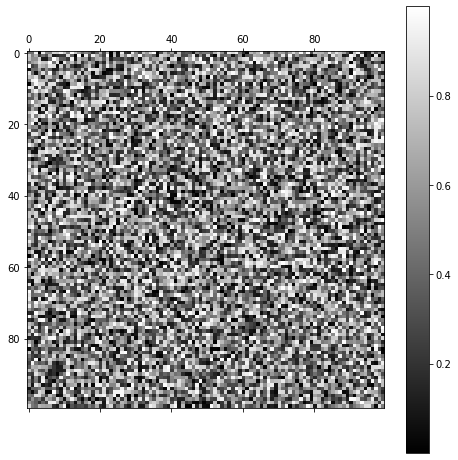

In [17]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

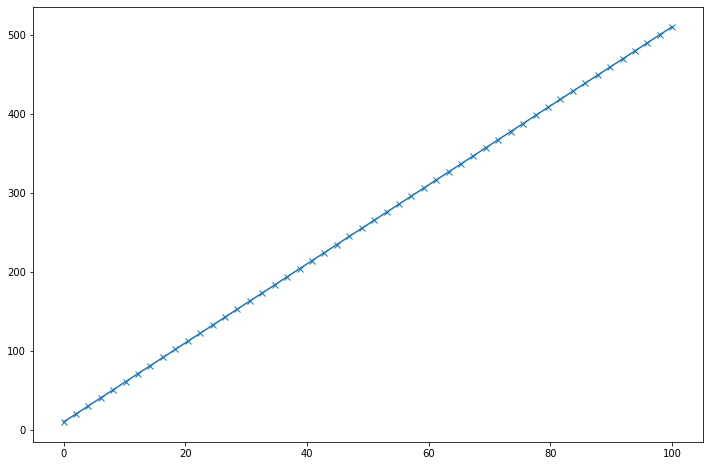

In [18]:
x = np.linspace(0, 100)
y = x * 5 + 10

plt.plot(x, y, 'x-')

# Basic Regression with a linear model

x is 1-dimensional

X: (50, 1), Weights: (1, 1), Bias: (1,), y: (50, 1)


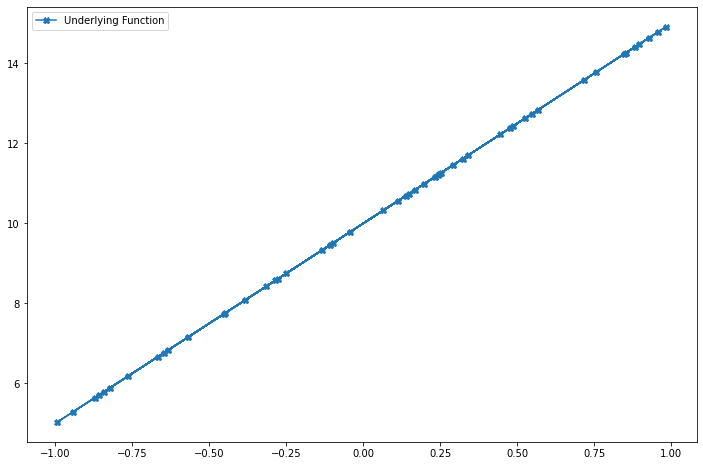

In [19]:
n = 50

d = 1
X = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5], ])
bias_true = np.array([10])

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, Weights: {weights_true.shape}, Bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(X, y_true, marker='X', label="Underlying Function")
plt.legend()

## Basic Prediction function: Linear

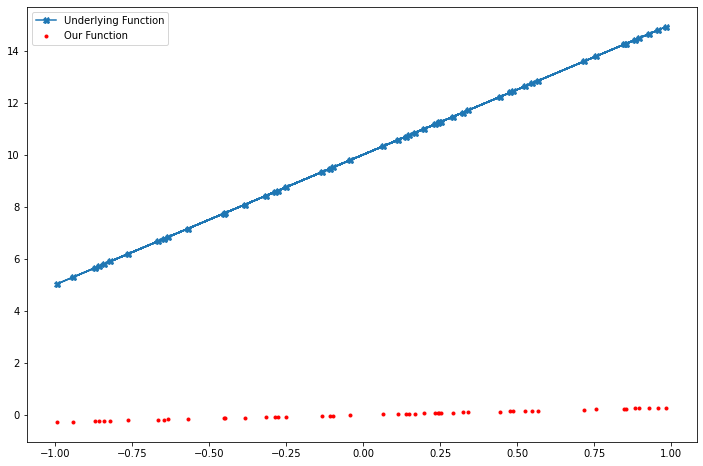

In [20]:
# Initailizing our predictions


class Linear:
    def __init__(self, num_input, num_output=1):
        # The initialization is important to properly deal with different input
        # sizes (otherwise gradients quickly go to 0).
        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))

    def __call__(self, X):
        return X @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(X)
plt.plot(X, y_true, marker="X", label="Underlying Function")
plt.scatter(X, y_pred, color='r', marker='.', label="Our Function")
plt.legend()

## Basic Loss Function: MSE

In [21]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use the Mean Squared Error (MSE), as our loss function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 111.71744831240103


## Back propagation

In [22]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient


class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) - 0.5
        self.bias = np.random.randn(1) - 0.5

    def __call__(self, X):
        self.X = X
        output = X @ self.weights + self.bias
        return output

    # y = w*x + b
    # dy/dx = w
    # dy/dw = X
    # dy/db = 1

    def backward(self, gradient):
        self.weights_gradient = self.X.T @ gradient
        self.bias_gradient = gradient.sum()
        self.X_gradient = gradient @ self.weights.T
        return self.X_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [23]:
# Taking one step forward and one step backward to make sure nothing breaks, 
# and that the loss decreases

loss = MSE()
linear = Linear(d)
y_pred = linear(X)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(X)
print(loss(y_pred, y_true))

135.84662841627642
88.70155980107553


## Train using Gradient Descent

Epoch 0, loss 143.6016174045568
Epoch 5, loss 20.40021959751914
Epoch 10, loss 4.71761227406725
Epoch 15, loss 1.7724844139796716
Epoch 20, loss 0.822766841310896
Epoch 25, loss 0.40412764055780703
Epoch 30, loss 0.20104572520805764
Epoch 35, loss 0.10029217065088097
Epoch 40, loss 0.05006050251187916
Epoch 45, loss 0.024990679344806442
Epoch 50, loss 0.012475920418930581
Epoch 55, loss 0.006228301424911739


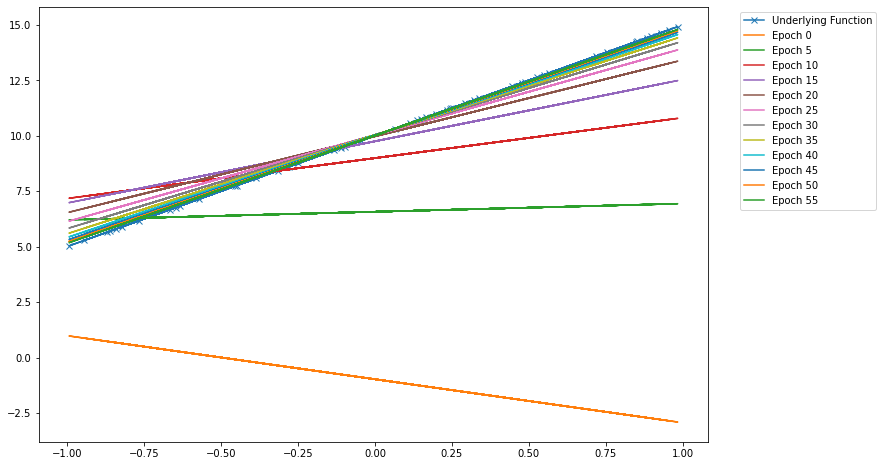

In [24]:
plt.plot(X, y_true, marker='x', label='Underlying Function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(X)
    loss_value = loss(y_pred, y_true)

    if epoch % 5 == 0:
        print(f'Epoch {epoch}, loss {loss_value}')
        plt.plot(X, y_pred.squeeze(), label=f'Epoch {epoch}')

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor = (1.04, 1), loc="upper left");

## 2-Dimensional Inputs

(100, 2) (2, 1) (1,)
X: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


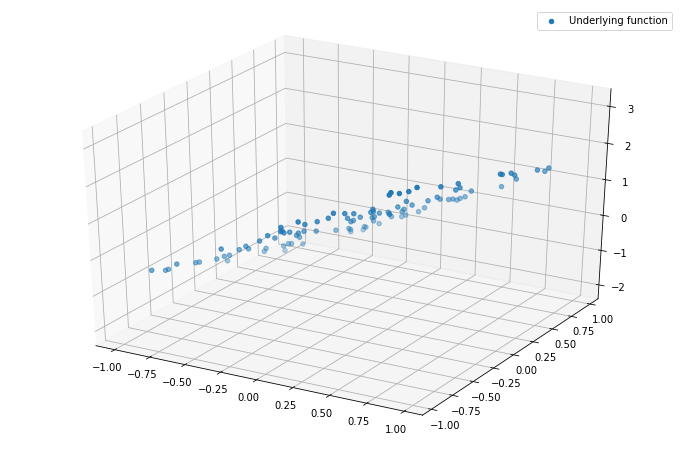

In [25]:
# 100 samples of 2 dimension
n = 100
d = 2
X = np.random.uniform(-1, 1, (n, d))

# y = W * X + b
# y = W_0 * X_0  +  W_1 * X_1  +  b
# y = W @ X + b
 

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(X.shape, weights_true.shape, bias_true.shape)

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(X, y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, label='Underlying function')
    if y_pred is not None:
        ax.scatter(X[:, 0], X[:, 1], y_pred, label='Our function')
    plt.legend()

plot_3d(X, y_true)

4.104393805834375


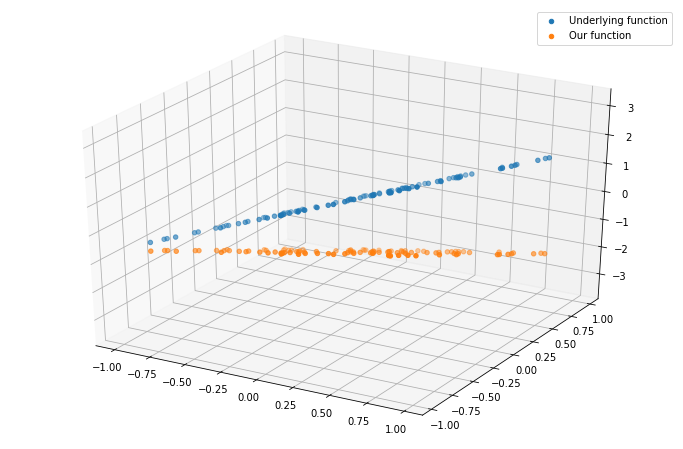

In [26]:
loss = MSE()
linear = Linear(2)
y_pred = linear(X)
print(loss(y_pred, y_true))
fig = plot_3d(X, y_true, y_pred)

Epoch: 0,  loss: 0.011616560394037427
Epoch: 1,  loss: 0.010279018105422253
Epoch: 2,  loss: 0.009096038977391198
Epoch: 3,  loss: 0.008049619591729685
Epoch: 4,  loss: 0.007123898149935284
Epoch: 5,  loss: 0.006304884532265593
Epoch: 6,  loss: 0.005580229617459282
Epoch: 7,  loss: 0.004939026427908879
Epoch: 8,  loss: 0.00437163756813119
Epoch: 9,  loss: 0.003869544731005149
Epoch: 10,  loss: 0.003425216961264242
Epoch: 11,  loss: 0.003031995021233502
Epoch: 12,  loss: 0.0026839896852639844
Epoch: 13,  loss: 0.002375992152307233
Epoch: 14,  loss: 0.0021033950469347014
Epoch: 15,  loss: 0.0018621227018134048
Epoch: 16,  loss: 0.0016485695951734955
Epoch: 17,  loss: 0.0014595459659379878
Epoch: 18,  loss: 0.0012922297543385937
Epoch: 19,  loss: 0.0011441241222070304
Epoch: 20,  loss: 0.0010130198984263953
Epoch: 21,  loss: 0.000896962373985954
Epoch: 22,  loss: 0.0007942219397651867
Epoch: 23,  loss: 0.0007032681201742169
Epoch: 24,  loss: 0.0006227466083625103
Epoch: 25,  loss: 0.00055

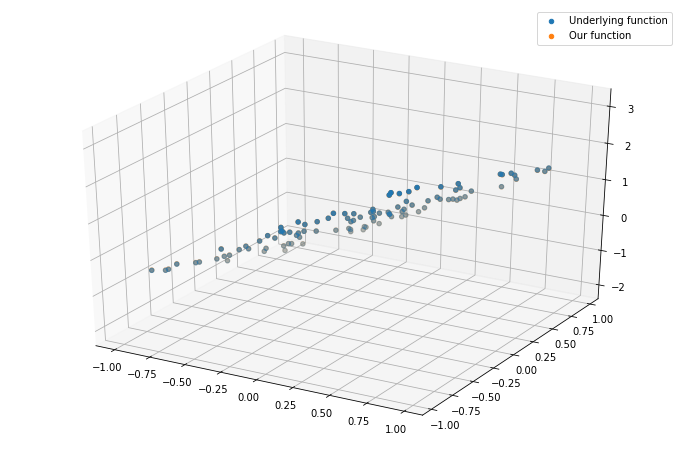

In [28]:
from typing import Callable

def fit(X: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss_value = loss(y_pred, y)
        print(f'Epoch: {epoch},  loss: {loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(X, y_true, model=linear, loss=loss, lr=0.1, num_epochs=60)
plot_3d(X, y_true, linear(X))

# Basic Regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data

How can this be made to work with non-linear data

X: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


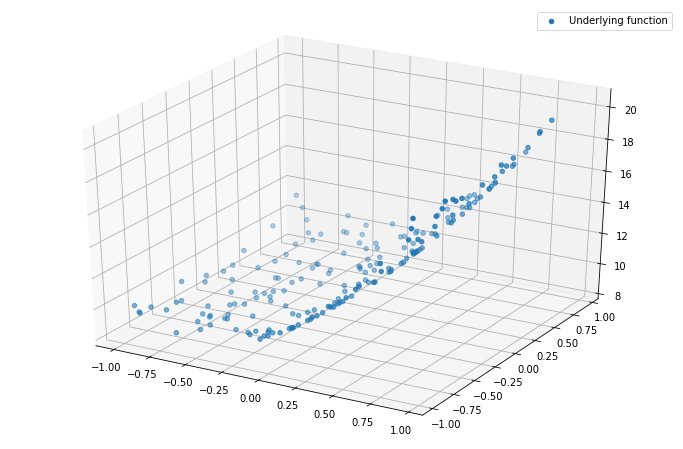

In [30]:
# Make a non-linear data

n = 200
d = 2
X = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([10])

y_true = (X ** 2) @ weights_true + X @ weights_true + bias_true
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(X, y_true)

Epoch: 0,  loss: 167.9116907017213
Epoch: 1,  loss: 112.00372139244475
Epoch: 2,  loss: 75.7978633339949
Epoch: 3,  loss: 52.24217717044933
Epoch: 4,  loss: 36.822213530364586
Epoch: 5,  loss: 26.646326342152005
Epoch: 6,  loss: 19.86089846155639
Epoch: 7,  loss: 15.27646209868641
Epoch: 8,  loss: 12.128635537178889
Epoch: 9,  loss: 9.925244814482063
Epoch: 10,  loss: 8.348543669371503
Epoch: 11,  loss: 7.192659888089763
Epoch: 12,  loss: 6.32356491616179
Epoch: 13,  loss: 5.653446027044864
Epoch: 14,  loss: 5.124289556507649
Epoch: 15,  loss: 4.69735617385488
Epoch: 16,  loss: 4.346426125975682
Epoch: 17,  loss: 4.053457562546303
Epoch: 18,  loss: 3.805790209946482
Epoch: 19,  loss: 3.594339384051541
Epoch: 20,  loss: 3.4124252690333106
Epoch: 21,  loss: 3.255010227629134
Epoch: 22,  loss: 3.118198656120626
Epoch: 23,  loss: 2.998906179652479
Epoch: 24,  loss: 2.8946384279336757
Epoch: 25,  loss: 2.8033410313540994
Epoch: 26,  loss: 2.7232961759845944
Epoch: 27,  loss: 2.6530498291267

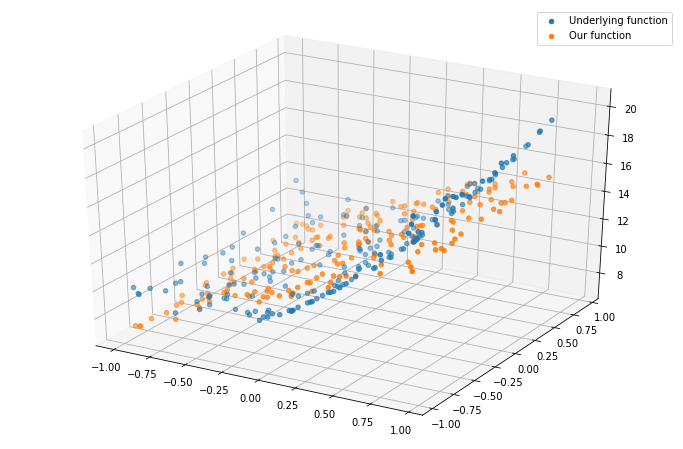

In [31]:
# WE can train just fine, but the final loss will remain high, as our linear function is incapable of representing the data

loss = MSE()
linear = Linear(d)
fit(X, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(X, y_true, linear(X))

## Add non-linearity: ReLU

In [32]:
# In order to learn non-linear functions, we need non-linearities in our model

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
        # import pdb; pdb.set_trace   # For debugging
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient



relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


## Train our new non-linear model

In [ ]:
class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden, 1)

    def __call__(self, X):
        l1 = self.linear1(X)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2

    def back